# Model Training

### Reproducibility: Using Seed
With aim to ensure reproducibility between different notebooks, but also between Research and Production Environment, for each step that includes some element of randomness, it is extremely important to set seed

In [64]:
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error as mse ,r2_score

pd.pandas.set_option('display.max_columns', None)
pd.pandas.set_option('display.max_rows', None)

In [55]:
path = '/kaggle/working/'

X_train = pd.read_csv(path+'xtrain.csv')
X_test = pd.read_csv(path+'xtest.csv')

X_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,LotFrontage_na,MasVnrArea_na,GarageYrBlt_na
0,0.75,0.75,0.429425,0.0,1.0,1.0,0.000000,0.333333,0.0,0.0,0.0,0.227273,0.2,1.0,0.75,0.6,0.333333,0.50,0.441176,0.114754,0.0,0.0,0.9,0.9,0.333333,0.000000,0.333333,0.5,0.5,0.333333,0.666667,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,1.0,1.0,1.0,1.0,0.459905,0.000000,0.0,0.429908,0.000000,0.0,0.666667,0.0,0.250,0.333333,0.666667,0.250000,1.0,0.000000,0.0,0.25,0.065421,1.0,0.50,0.366714,0.5,0.5,0.0,0.000000,0.175503,0.0,0.0,0.0,0.0,0.0,0.75,1.0,0.0,0.363636,0.666667,0.75,0.0,0.0,0.0
1,0.75,0.75,0.447575,0.0,1.0,1.0,0.000000,0.333333,0.0,0.0,0.0,0.636364,0.4,1.0,0.75,0.6,0.666667,0.50,0.029412,0.081967,0.0,0.0,0.9,0.9,1.000000,0.184375,0.666667,0.5,1.0,0.666667,0.666667,0.000000,1.0,0.174699,0.0,0.0,0.285959,0.270704,1.0,1.0,1.0,1.0,0.605422,0.000000,0.0,0.565934,0.333333,0.0,0.666667,0.0,0.375,0.333333,0.666667,0.333333,1.0,0.000000,0.0,0.75,0.037383,0.0,0.75,0.634697,0.5,0.5,1.0,0.000000,0.248629,0.0,0.0,0.0,0.0,0.0,0.00,1.0,0.0,0.090909,0.666667,0.75,1.0,0.0,0.0
2,1.00,0.75,0.546795,0.0,1.0,1.0,0.666667,0.333333,0.0,1.0,0.0,1.000000,0.4,1.0,0.75,1.0,0.666667,0.50,0.080882,0.180328,0.0,0.0,0.3,0.3,0.333333,0.000000,0.666667,0.5,1.0,0.666667,0.666667,0.666667,1.0,0.152729,0.0,0.0,0.109161,0.182815,1.0,1.0,1.0,1.0,0.460241,0.429056,0.0,0.635421,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.333333,0.500000,1.0,0.333333,0.6,0.75,0.093458,0.0,0.50,0.320874,0.5,0.5,1.0,0.244565,0.237660,0.0,0.0,0.0,0.0,0.0,0.00,1.0,0.0,0.454545,0.666667,0.75,0.0,0.0,0.0
3,1.00,0.75,0.495064,0.0,1.0,1.0,0.000000,0.333333,0.0,0.0,0.5,0.772727,0.4,1.0,0.75,1.0,0.666667,0.50,0.102941,0.229508,0.0,0.0,0.2,0.1,0.333333,0.000000,0.666667,0.5,1.0,1.000000,0.666667,1.000000,1.0,0.212792,0.0,0.0,0.044949,0.213748,1.0,1.0,1.0,1.0,0.516025,0.461985,0.0,0.676363,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.416667,1.0,0.000000,0.0,0.75,0.130841,0.5,0.50,0.375882,0.5,0.5,1.0,0.402174,0.080439,0.0,0.0,0.0,0.0,0.0,0.00,1.0,0.0,0.272727,0.666667,0.75,0.0,0.0,0.0
4,0.25,0.75,0.256561,0.0,1.0,1.0,0.666667,0.333333,0.0,0.0,0.0,0.227273,0.4,1.0,0.25,0.6,0.333333,0.25,0.220588,0.508197,0.0,0.0,0.3,0.3,0.333333,0.000000,0.333333,0.5,1.0,0.666667,0.666667,1.000000,1.0,0.255138,0.0,0.0,0.000000,0.235679,1.0,0.5,1.0,1.0,0.552989,0.000000,0.0,0.516920,0.666667,0.0,0.666667,0.0,0.500,0.666667,0.333333,0.500000,1.0,0.000000,0.0,0.75,0.268695,0.0,0.00,0.000000,0.5,0.5,0.0,0.436141,0.000000,0.0,0.0,0.0,0.0,0.0,0.00,1.0,0.0,0.636364,0.333333,0.25,0.0,0.0,1.0


In [56]:
#loading target (target is log transformed)
y_train = pd.read_csv(path+'ytrain.csv')
y_test = pd.read_csv(path+'ytest.csv')

y_train.head()

,SalePrice
0,11.589887
1,12.345835
2,12.505399
3,12.700769
4,11.918391


#### Loading Selected Features

In [61]:
paht = "/kaggle/working/"
features = pd.read_csv(path+'selected_features.csv')
features = features['0'].to_list() 

print(len(features))
print()
print(features)

39

['MSSubClass', 'MSZoning', 'LotFrontage', 'LotShape', 'LandContour', 'LotConfig', 'Neighborhood', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'RoofStyle', 'Exterior1st', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageArea', 'PavedDrive', 'WoodDeckSF', 'ScreenPorch', 'SaleCondition']


In [62]:
#selected features only to reduce train and test set

X_train = X_train[features]
X_test = X_test[features]

### Regularised Linear Regression: `Lasso`
Remember to set seed

In [63]:
#setting up model

lin_model = Lasso(alpha=0.001,random_state=108)

#training model
lin_model.fit(X_train,y_train)

Lasso(alpha=0.001, random_state=108)

### Model Evaluation

1. I did log transformed output/target (SalePrice) while feature engineering
2. To get true performance of Lasso, I have to transform both, target and predictions back to original SalePrice

`Evaluating performance using` 
* mean squared error
* root mean squared error
* r2 score

In [66]:
#predictions on train set
pred = lin_model.predict(X_train)

# determine mse, rmse and r2
print('Train mse: {}'.format(int(mse(np.exp(y_train),np.exp(pred)))))
print('Train rmse: {}'.format(int(mse(np.exp(y_train),np.exp(pred),squared=False))))
print('Train r2: {}'.format(r2_score(np.exp(y_train),np.exp(pred))))
print()

Train mse: 795509178
Train rmse: 28204
Train r2: 0.874326725586055



In [67]:
#predictions on test set
pred = lin_model.predict(X_test)

# determine mse, rmse and r2
print('Test mse: {}'.format(int(mse(np.exp(y_test),np.exp(pred)))))
print('Test rmse: {}'.format(int(mse(np.exp(y_test),np.exp(pred),squared=False))))
print('Test r2: {}'.format(r2_score(np.exp(y_test),np.exp(pred))))
print()

print('Average house price: ', int(np.exp(y_train).median()))

Test mse: 954896551
Test rmse: 30901
Test r2: 0.8433647749932477

Average house price:  163945


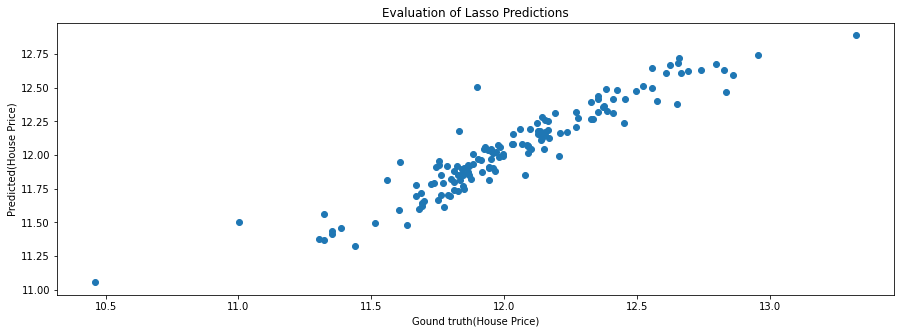

In [72]:
#evaluating predictions, respect to real sale price
plt.figure(figsize=(15,5))
plt.scatter(y_test,lin_model.predict(X_test))
plt.xlabel('Gound truth(House Price)')
plt.ylabel('Predicted(House Price)')
plt.title('Evaluation of Lasso Predictions')
plt.show()

`Objective:`

Model is performing pretty good in estimating house prices

In [74]:
y_test.reset_index(drop=True).head()

,SalePrice
0,12.955127
1,12.454104
2,11.813030
3,11.686879
4,12.089539


In [76]:
#evaluating distribution of errors: must be fairly normally distributed

y_test.reset_index(drop=True,inplace=True)
preds = pd.Series(lin_model.predict(X_test))
preds.head()

0    12.740807
1    12.414281
2    11.797005
3    11.718639
4    12.013275
dtype: float64

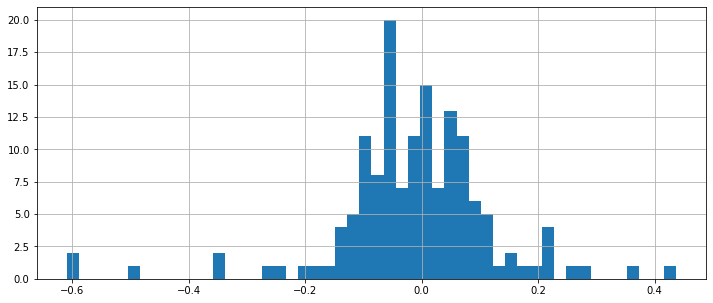

In [80]:
#evaluating distribution of errors: must be almost normally distributed
errors = y_test['SalePrice'] - preds

plt.figure(figsize=(12,5))
errors.hist(bins=50)
plt.show()

**`Observation:`**
Distribution of errors follows almost gaussian distribution
* Shows that our model is doing a good job as well

### Feature Importance

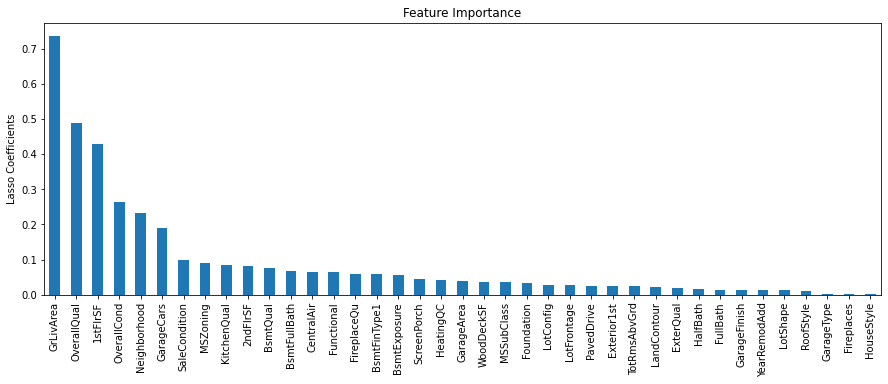

In [84]:
#feature importance check jut for visualization

importance = pd.Series(np.abs(lin_model.coef_.ravel()))
importance.index = features
importance.sort_values(inplace=True,ascending=False)

importance.plot.bar(figsize=(15,5))
plt.ylabel('Lasso Coefficients')
plt.title('Feature Importance')
plt.show()

### Saving Model

In [85]:
#model is performing good let's save it predict on new data

joblib.dump(lin_model,'linear_regression.joblib') 

['linear_regression.joblib']